# Sample estimates of autocorrelations
*ELEC-C5212* - Johdatus signaalien tilastolliseen mallintamiseen /  Esa Ollila. 
***

* Suppose we have a single realization $x(n)$, $n=0, \ldots, N-1$ of length $N$.
* Then we may consider estimating the mean $\mu_X= \mathbb{E}[x(n)]$ using a sample mean that is taken as average over time, 
$$
\hat \mu_x=  \frac{1}{N} \sum_{n=0}^{N-1} x(n).
$$ 
* Note: more appropriate notation would be $\hat \mu_x(N)$ to indicate the dependence 
on $N$. 
* **Q:** How to estimate $r_x(k)$  or $r_{xy}(k)$ from a single length $N$ realization of a random process $x(n)$? 


## Sample autocorrelation
* For each lag $k$, the autocorrelation $r_x(k)$ is an expected value of the process
$
y_k(n)=x(n) x(n-k)^*. 
$

* Thus one may consider estimating $r_x(k)$ as sample mean of $y_k(n)$-s: 
$$
\hat r_x(k) =  \frac{1}{N-k} \sum_{n=k}^{N-1} y_k(n)  
=   \frac{1}{N-k} \sum_{n=k}^{N-1} x(n) x(n-k)^* ,   
$$
where $k=0,1,\ldots, N-1$
* $\hat r_{x}(k)$ is called the *sample autocorrelation function*.

* One may also use   
$$
         \hat{r}_x(k)=\frac{1}{N}\sum_{n=k}^{N-1}x(n)x^*(n-k). 
$$
which  differs by scaling (so $\frac 1{N-k}$ or $\frac{1}{N}$) used for each lag.

* The latter estimator is **biased** while the former is an **unbiased** estimator of $r_x(k)$. 

* The sample autocorrelation estimates has same properties as $r_x(k)$: for example, also $\hat r_x(k)$ is conjugate symmetric, so verifying
$$ \hat{r}_x(k)=\hat{r}_x^*(-k)$$ 
and the mean-square value  at lag $k=0$ is the sample variance. 




## Sample crosscorrelation

* Suppose we have two signals $\{x(n)\}$ and $\{ y(n)\}$ of same length $N$. 
* Then the commonly used sample estimate of cross-correlation $r_{xy}(k)$ is 
$$
\hat r_{xy}(k) =  \begin{cases}  \frac{1}{N-k} \sum_{n=0}^{N-k-1} x(n+k) y(n)^* &, k \geq 0 \\ 
\frac{1}{N-k} \sum_{n=0}^{N-k-1} x(n) y(n+k)^*  &, k <0 
\end{cases}
$$

* MATLAB: sample cross-correlation statistic can be obtained using `xcorr(x,y,'unbiased')` while 
option <code>'biased'</code> will give an estimate that is scaled by $ \frac 1 N$  instead of $\frac 1 {N-k}$. 


## `xcorr` function
In `utils` folder we have implemented `xcorr` function for python to compute $\hat r_x(k)$ or $\hat r_{xy}(k)$. 
* It imitates Matlab-s function with the same name. 
* The biased form of autocorrelation estimator is obtained with option `scaleopt="biased"` (while `"unbiased"` yields the unbiased estimator). 
* Using option <code>maxlags</code> specifies that you wish to compute the lags from `k=0` until `k=maxlags` only

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath("../utils/"))
from utils import xcorr

***
## Example 1: autocorrelation of 1Hz unit amplitude random phase sinusoid 

* Consider the following unit amplitude random phase 1Hz sinusoid sampled at 20 Hz:
$$
x(n) = \cos(n2\pi(1/20) + \phi),\quad \phi\sim\text{Unif}(-\pi,\,\pi)
$$
where $n=0,1,\ldots,N-1$ with sample length $N=2^5=32$ samples. 
* In the following we estimate the autocorrelation function using the `xcorr` function.

In [4]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

In [5]:
sns.set_context("poster")
sns.set_style("whitegrid") 
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc("text",usetex=True)
rc('lines', linewidth=2.5)
rc('lines', markersize=8.5)

### Generating the data
We generate a random phase sinusoid at a frequency of 1 Hz

In [7]:
N = 2**5 # Number of points
fs = 20  # sampling frequency 
f0 = 1   # frequency  
w0 = 2*pi*(f0/fs) # angular frequency
np.random.seed(0) # set random seed for reproducibility
phi = np.random.uniform(0, 2*pi)  # random phase
print(phi)
A = 1  # Unit amplitude 
x = A*np.cos(np.arange(N)*w0+phi)
t = np.arange(len(x))/fs

3.448296944257913


Then plot the realisation of the random phase sinusoid:

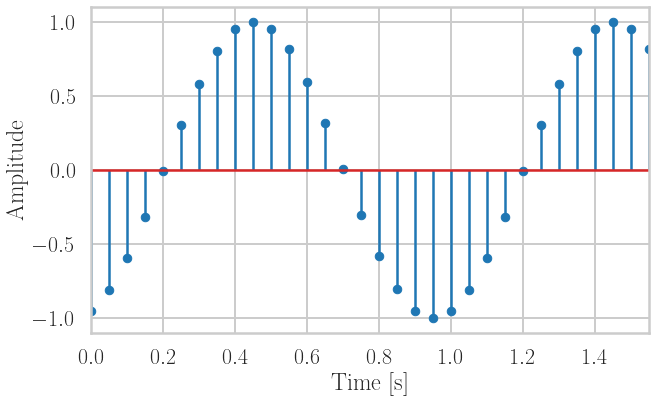

In [8]:
plt.figure(figsize=(10,6))
plt.stem(t, x)
plt.xlim([t.min(), t.max()])
plt.xlabel("Time [s]"), plt.ylabel("Amplitude")
plt.show()

### Computing the sample autocorrelations 
Since the true autocorrelation is periodic with period $k_0=20$, we give 20 as `maxlags` parameter to the `xcorr` function. 

In [9]:
lags, rx = xcorr(x, maxlags=20, scaleopt="unbiased")
_, rxb = xcorr(x, maxlags=20, scaleopt="biased")

We will compare estimated autocorrelation $\hat{r}_x(k)$  against the true (theoretical) autocorrelation function given by 
$$
r_x(k) = \frac{1}{2}\cos(k\omega_0)
$$
Recall Example 4.1b and equation (4.1) of lecture notes. 

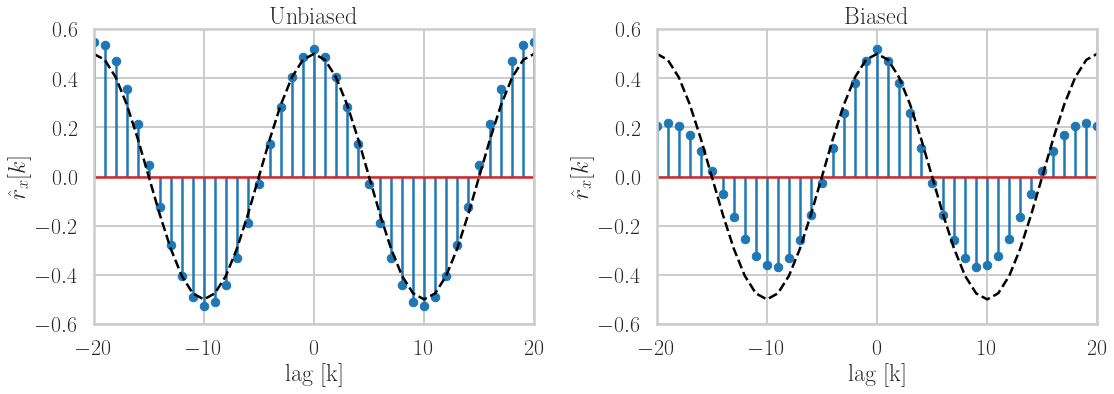

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

ax[0].stem(lags, rx)
ax[0].plot(lags, 0.5*np.cos(lags*w0), "--k")
ax[0].set_title("Unbiased")

ax[1].stem(lags, rxb)
ax[1].plot(lags, 0.5*np.cos(lags*w0), "--k")
ax[1].set_title("Biased")

for i in range(2):
    ax[i].set_xlim([-20, 20])
    ax[i].set_ylim([-0.6, 0.6])
    ax[i].set_xlabel("lag [k]"), ax[i].set_ylabel("$\\hat{r}_x[k]$")  
plt.tight_layout()
plt.show()

***
## Example 2: Maximum cross-correlation of ECG signal with sine waves of varying frequencies

* we cross-correlate the noisy ECG signal shown in Figure 1.2 of lecture notes with sinusoids ranging in frequencies  between $[0.05, 0.1, 0.15, \ldots, 6.5]$ in  Hz. 
* We then calculate the maximum cross-correlation and identify the sine wave that obtained the maximal cross-correlation with the ECG signal.


**Note:** if signals $x(n)$ and $y(n)$ are of different length, then `xcorr` appends zeros at the end of the shorter vector (say $y(n)$) so it has the same length, $N$, as the other (say $x(n)$) and computes the value 
$$
\sum_{n=0}^{N-k-1}x(n+k)y(n)^*,\quad\text{for}\,k\geq0,
$$
i.e., without normalizing for the sum $1/N$ or by $1/(N-k)$

## Load the ECG data

In [12]:
Ts = 0.001 # This is the sampling interval (in seconds)
fs = 1/Ts  # This is the sampling frequency
x = np.loadtxt("cardiac_noisy.txt")
N = len(x)
tn = np.arange(N)*Ts # Sampling time instants

**Examples of sinewaves**

In [13]:
f1 = 1.3 # Sine wave of 1.3 Hz
f2 = 13  # Sine wave of 13 Hz
y1 = np.sin(2*pi*f1*tn)
y2 = np.sin(2*pi*f2*tn)

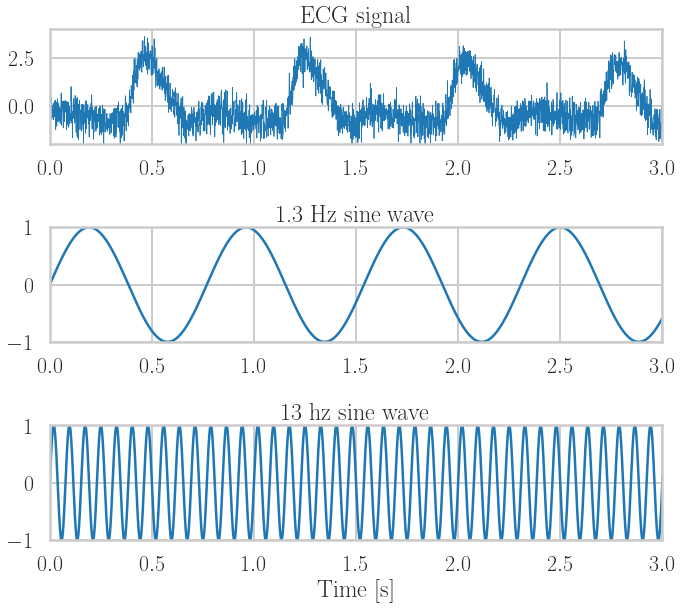

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,9))
ax[0].plot(tn, x,linewidth=0.8)
ax[0].set_title("ECG signal"), ax[1].plot(tn, y1)
ax[1].set_title("1.3 Hz sine wave"), 
ax[2].plot(tn, y2), ax[2].set_title("13 hz sine wave"), ax[2].set_xlabel("Time [s]")
for i in range(3):
    ax[i].set_xlim([0,3])
    if i==0: 
        ax[i].set_ylim([-2, 4])
    else:
        ax[i].set_ylim([-1, 1])
plt.tight_layout()
plt.show()

**Next we find the max correlation between ECG and 1.3Hz sine wave**

In [15]:
lags, rxy = xcorr(x, y1, maxlags=1000, scaleopt="unbiased")
lagDiff = lags[np.argmax(rxy)]
print(f"lag difference in samples: {lagDiff}")

lag difference in samples: 331


Time lag (or delay) of the 1.3 Hz sine wave yielding max cross-correlation:

In [12]:
timeDiff = lagDiff*Ts
print(f"lag difference in seconds: {timeDiff:.3f}")
y1al = y1[lagDiff:] #this is the aligned version of the sine wave

lag difference in seconds: 0.331


Next plot both the ECG signal, 1.3 Hz sine wave and its aligned version

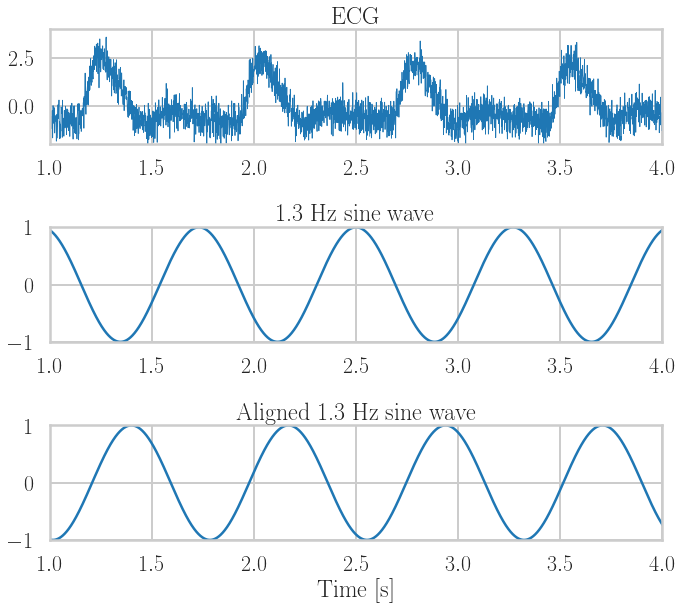

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,9))
ax[0].plot(tn, x,linewidth=0.8)
ax[0].set_title("ECG")

ax[1].plot(tn, y1)
ax[1].set_title("1.3 Hz sine wave")

ax[2].plot(tn[:len(y1al)], y1al)
ax[2].set_title("Aligned 1.3 Hz sine wave")
ax[2].set_xlabel("Time [s]")

for i in range(3):
    ax[i].set_xlim([1,4])
    if i==0:
        ax[i].set_ylim([-2, 4])
    else:
        ax[i].set_ylim([-1, 1])  
plt.tight_layout()
plt.show()

## Compute the maximum cross-correlations among the ensemble of sine waves
Sine wave frequencies are allowed to vary from 0.05 to 6.5 Hz in 0.05 Hz increments

In [14]:
steps = 130
f = np.zeros(steps)
rmax = np.zeros(steps)
from tqdm import tqdm
for i in tqdm(range(steps)):
    f[i] = 0.05*i
    y = np.sin(2*pi*f[i]*tn)
    lags, rxy = xcorr(x, y, maxlags=1000, scaleopt="unbiased")
    rmax[i] = np.max(rxy)

100%|██████████| 130/130 [00:06<00:00, 20.52it/s]


Identify the frequency of the sine with maximal cross-correlation with ECG signal $x(n)$:

In [15]:
max_rmax = np.max(rmax)
max_f = f[np.argmax(rmax)]
print(f"best match: {max_f:.2f} Hz")

best match: 1.30 Hz


### Plotting results

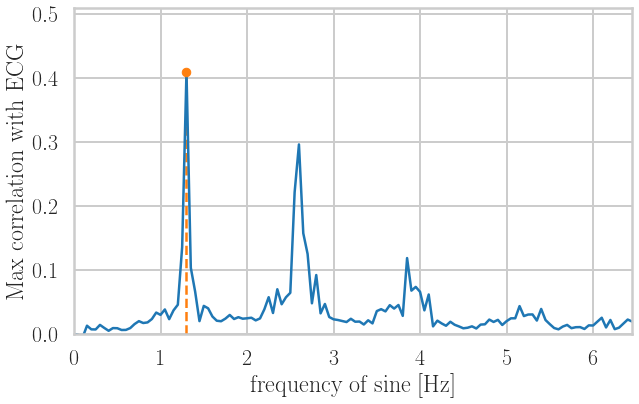

In [16]:
plt.figure(figsize=(10,6))
plt.plot(f, rmax)
plt.stem([max_f],[max_rmax], markerfmt="C1o", linefmt="C1--", )
plt.xlim([f.min(), f.max()])
plt.ylim([0, max_rmax+0.1])
plt.xlabel("frequency of sine [Hz]")
plt.ylabel("Max correlation with ECG")
plt.show()

### Compared with periodogram

* As can be seen some frequencies give much higher correlation between the sinusoid and the ECG. 
* Strongest peak is seen around 1.3 Hz.
* The DFT and the periodogram is more efficient method to obtain the same information shown above but with higher accuracy.

In [17]:
from scipy.signal import periodogram

In [20]:
fn, Px = periodogram(x, fs=fs, nfft=N)
max_rmax2 = np.max(Px)
max_f2 = f[np.argmax(Px)]
print(f"best match: {max_f2:.3f} Hz")

best match: 1.300 Hz


**Plotting the periodogram**

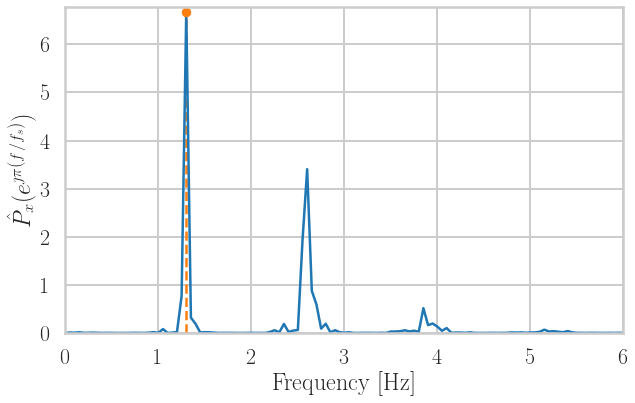

In [21]:
plt.figure(figsize=(10,6))
plt.plot(fn, Px)
plt.stem([max_f2],[max_rmax2], markerfmt="C1o", linefmt="C1--", )
plt.xlim([0,6])
plt.ylim([0, max_rmax2+0.1])
plt.xlabel("Frequency [Hz]")
plt.ylabel("$\hat P_x(e^{\jmath \pi (f/f_s)})$")
plt.show()